In [246]:
from pathlib import Path
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import os.path
from os import path
from statsmodels.tsa.arima.model import ARIMA
from sklearn import preprocessing
#from gapminder import gapminder
import csv
import matplotlib.pyplot as plt
import warnings
import datetime

In [279]:
class FirstAnalysis:
    
    """"
    ...
    
    Attributes
    ----------
    
    self: class
        The FirstAnalysis class itself.

     Methods
     ----------
     
     download_url()
        Dowloads the dataset that is used in the entire analysis.
        
     read_df()
        Reads the information of the file dowloaded.
        
    show_countries()
        Prints information about every country in the file.
        
    chart_consumption()
        Plots an area chart of the diferent types of consumptions for the selected country.
        
    total_consumption():
        Plots a bar chart of the total consumptions for the selected country or list of countries.
     
    gdp():
        Plots a bar chart of the GDP for the selected country or list of countries.
    
    gapminder():
        Plots a chart with the total energy consumption of each country, its population and gdp.
        
    gdp_evolution():
        Plots a line chart of the GDP and emissions evolution for the selected country or list of countries.
    
    ARIMA():
        Plots a chart with the total consumption value and its prediction for a selected country.
    
    scatter_total():
        Plots a scatter plot between emissions and consumptions. Size of the dots = population
    
     """
    
    def __init__(self):
        self.data_df = pd.DataFrame
        self.url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
        
    def download_url(self,save_path=Path("downloads/energy.csv"), chunk_size=128, csv_name="downloads/energy.csv"):
        
        """
        Dowloads the dataset that is used in the entire analysis.
        
        Parameters
        -----------
        self: class
            The FirstAnalysis class itself.
        
        save_path: str
            The path for the folder where the file is stored after being dowload.
            
        Returns
        --------
        Saves the file in the designated folder
        In case the file has already been dowloaded it raises an Exception saying the file already exists.
        
        """
        
        biofuel = (1450/1000000)*1000000000
        coal = (1000/1000000)*1000000000
        gas = (455/1000000)*1000000000
        hydro = (90/1000000)*1000000000
        nuclear = (5.5/1000000)*1000000000
        oil = (1200/1000000)*1000000000
        solar = (53/1000000)*1000000000
        wind = (14/1000000)*1000000000
            
        if os.path.exists("downloads/energy.csv") == True:
            self.data_df = pd.read_csv(csv_name)
            self.data_df = self.data_df[self.data_df['year'] >= 1970]
            self.data_df['index'] = pd.to_datetime(self.data_df['year'], format = '%Y')
            self.data_df.set_index('index', inplace=True)
            self.data_df['emissions'] = ((self.data_df["biofuel_consumption"]*biofuel) + 
                                    (self.data_df["coal_consumption"]*coal) + 
                                    (self.data_df["gas_consumption"]*gas) + 
                                    (self.data_df["hydro_consumption"]*hydro) + 
                                    (self.data_df["nuclear_consumption"]*nuclear) +  
                                    (self.data_df["oil_consumption"]*oil) + 
                                    (self.data_df["solar_consumption"]*solar) + 
                                    (self.data_df["wind_consumption"]*wind))
            
            
            display(self.data_df)
            raise Exception("File already exists")
            
        else:
            if os.path.isdir("downloads") == True:
                r = requests.get(self.url, stream=True)
                with open(os.path.join(save_path), 'w') as f:
                    writer = csv.writer(f)
                    for line in r.iter_lines():
                        writer.writerow(line.decode('utf-8').split(','))
            else:
                os.mkdir('downloads')
                r = requests.get(self.url, stream=True)
                with open(os.path.join(save_path), 'w') as f:
                    writer = csv.writer(f)
                    for line in r.iter_lines():
                        writer.writerow(line.decode('utf-8').split(','))
                self.data_df = pd.read_csv(csv_name)
                self.data_df = self.data_df[self.data_df['year'] >= 1970]
                self.data_df['index'] = pd.to_datetime(self.data_df['year'], format = '%Y').dt.year
                self.data_df.set_index('index', inplace=True)
                
                self.data_df['emissions'] = ((self.data_df["biofuel_consumption"]*biofuel) + 
                                            (self.data_df["coal_consumption"]*coal) + 
                                            (self.data_df["gas_consumption"]*gas) + 
                                            (self.data_df["hydro_consumption"]*hydro) + 
                                            (self.data_df["nuclear_consumption"]*nuclear) +  
                                            (self.data_df["oil_consumption"]*oil) + 
                                            (self.data_df["solar_consumption"]*solar) + 
                                            (self.data_df["wind_consumption"]*wind))
                display(self.data_df)
        
    def show_countries(self):
        
        """
        Prints information about every country in the file.
        
        Parameters
        -----------
        self: class
            The FirstAnalysis class itself.
            
        Returns
        --------
        Prints a list of all the unique countries present in the dataset on the screen.
        
        """
        
        display(self.data_df.country.unique())
    
    def chart_consumption(self, country, normalize: bool = False):
        
        """
        Plots an area chart of the diferent types of consumptions for the selected country.
        
        Parameters
        -----------
        self: class
            The FirstAnalysis class itself.
        
        country: str
            Name of the country selected to plot.
        
        normalize: boolean
            False if the information is not normalized.
            True if the information is normalized.
            
        Returns
        --------
        Plots an area graph on the screen.  
        In case the selected country is not in the dataset raises an Value Error saying the country does not exist.
        
        """
        
        self.data_df.reset_index(drop = True, inplace = True)
        self.country = country
        
        if self.country in list(self.data_df.country.unique()) and normalize == False:
            country = self.country #Only select the country we are working with
            df = self.data_df[self.data_df['country'] == country]
            year = df['year']
            consumption = pd.DataFrame(year)
            consList = []
            for c in list(df.columns):
                if c.endswith('_consumption'):
                    if c != "fossil_fuel_consumption" and c != "renewables_consumption" and c != "primary_energy_consumption" and c!= "low_carbon_consumption":
                        consumption = pd.concat([consumption, self.data_df[c]], axis=1)
                        consList.append(c) 
            consumption.set_index('year', inplace = True)
            consumption.plot(kind='area', stacked=True, title = f'Energy consumption {country}')
            plt.show(block=True)
            
        elif self.country in list(self.data_df.country.unique()) and normalize == True:
            country = self.country #Only select the country we are working with
            df = self.data_df[self.data_df['country'] == country]
            year = df['year']
            consumption = pd.DataFrame(year)
            consList = []
            for c in list(df.columns):
                if c.endswith('_consumption'):
                    if c != "fossil_fuel_consumption" and c != "renewables_consumption" and c != "primary_energy_consumption" and c!= "low_carbon_consumption":
                        consumption = pd.concat([consumption, self.data_df[c]], axis=1)
                        consList.append(c) 
            consumption.set_index('year', inplace = True)
            consumption = consumption.div(consumption.sum(axis=1), axis=0)
            consumption.plot(kind='area', stacked=True, title = f'Energy consumption normalized {country}')
            plt.show(block=True)
            
        else:
            raise ValueError("Country does not exist")
            
            
    def total_consumption(self, args):
        
        """
        Plots a bar chart of the total consumptions for the selected country or list of countries.
        
        Parameters
        -----------
        self: class
            The FirstAnalysis class itself.
            
        args: tuple
            List of countries names selected to plot.
            
        Returns
        --------
        Plots a bar graph on the screen.
        In case the selected country is not in the dataset raises an Value Error saying the country does not exist.
        
        """
            
        data_frames = []
        if type(args) == str:
            if args in list(self.data_df.country.unique()):
                df_country = self.data_df[self.data_df['country'] == args]
                df_country = df_country[["year", "country", "fossil_fuel_consumption", "renewables_consumption"]]
                data_frames.append(df_country)
            else:
                raise ValueError("Country does not exist")
                
        elif type(args) == list:
            for i in args:
                if i in list(self.data_df.country.unique()):
                    df_country = self.data_df[self.data_df['country'] == i]
                    df_country = df_country[["year", "country", "fossil_fuel_consumption", "renewables_consumption"]]
                    data_frames.append(df_country)
                else:
                    raise ValueError("Country does not exist")
        else:
            raise ValueError("Invalid input")
            
        total_countries = pd.concat(data_frames, axis = 0)
        plt.bar(total_countries['country'], (total_countries['fossil_fuel_consumption'] + total_countries['renewables_consumption']))
        plt.title('Total consumption of fossil and renewable energy', fontsize=14)
        plt.xlabel('Country', fontsize=14)
        plt.ylabel('Consumption', fontsize=14)
        plt.show()
        
    def gdp(self, countries):
        
        """
        Plots a bar chart of the GDP for the selected country or list of countries.
        
        Parameters
        -----------
        self: class
            The FirstAnalysis class itself.
            
        countries: str or list
            String or list of countries names selected to plot.
            
        Returns
        --------
        Plots a bar graph on the screen. 
        In case the selected country is not in the dataset raises an Value Error saying the country does not exist.
        In case the type countries is not str or list raises a Value Error Invalid input.
        
        """
        gdp = []
        if type(countries) == str:
            if countries in list(self.data_df.country.unique()):
                df_country = self.data_df[self.data_df['country'] == countries]
                df_country = df_country[["year", "country", "gdp"]]
                gdp.append(df_country)
            else:
                raise ValueError("Country does not exist")
                
        elif type(countries) == list:
            for i in countries:
                if i in list(self.data_df.country.unique()):
                    df_country = self.data_df[self.data_df['country'] == i]
                    df_country = df_country[["year", "country", "gdp"]]
                    gdp.append(df_country)
                else:
                    raise ValueError("Country does not exist")
            
        else:
            raise ValueError("Invalid input")
            
        total = pd.concat(gdp, axis = 0)
        plt.bar(total['country'], (total['gdp']))
        plt.title('Total GDP', fontsize=14)
        plt.xlabel('Country', fontsize=14)
        plt.ylabel('GDP', fontsize=14)
        plt.show()
        
    def gapminder(self, year):
        """
        Plots a chart with the total energy consumption of each country, its population and gdp.
        
        Parameters
        ---------
        self: class
            The FirstAnalysis class itself.
            
        year: int
            Year selected
            
        Returns
        --------
        Plots chart on the screen. 
        Raises an TypeError when selected year is not an integer.
        """
        warnings.filterwarnings('ignore')
        self.data_df.reset_index(drop = True, inplace = True)
        
        if type(year) == int:
            df_gapminder = self.data_df[self.data_df['year'] == year]
            df_gapminder2 = df_gapminder.copy()
            df_gapminder2['Total_consumption'] = df_gapminder2['fossil_fuel_consumption'] + df_gapminder2['renewables_consumption']
            
            np_pop = np.array(df_gapminder2.population)
            year_new = str(year)
            
            f, ax = plt.subplots(figsize=(7, 5))
            ax.set(xscale="log", yscale="log")
            sns.set(rc={'figure.figsize':(11.7,8.27)})
            
            sns.scatterplot(df_gapminder2['gdp'], df_gapminder2['Total_consumption'],
                            size = np_pop, sizes=(40,400), ax = ax)
            
            
            plt.grid(True)
            plt.xlabel('GDP per country [in USD]')
            plt.ylabel('Total Consumption')
            plt.title(year, fontsize=30)
            plt.show()
        
        else:
            raise Exception("Input not an integer. Idiot?!")
    
    
    def gdp_evolution(self, country):
        
        """
        Plots a line chart of the GDP evolution for the selected country or list of countries.
        
        Parameters
        -----------
        self: class
            The FirstAnalysis class itself.
            
        country: str or list
            String or list of countries names selected to plot.
            
        Returns
        --------
        Plots a line graph on the screen. 
        In case the selected country is not in the dataset raises an Value Error saying the country does not exist.
        In case the type countries is not str or list raises a Value Error Invalid input.
        
        """
        emissions = []
        if type(country) == str:
            
            if country in list(self.data_df.country.unique()):
                df_country_evol = self.data_df[self.data_df['country'] == country]
                df_country_evol = df_country_evol[["year", "gdp", "emissions"]]
                fig, ax1 = plt.subplots()

                color = 'tab:red'
                ax1.set_xlabel('Year')
                ax1.set_ylabel('Gdp', color=color)
                ax1.plot(df_country_evol['year'], df_country_evol['gdp'], color=color)
                ax1.tick_params(axis='y', labelcolor=color)

                ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

                color = 'tab:blue'
                ax2.set_ylabel('Emissions', color=color)  # we already handled the x-label with ax1
                ax2.plot(df_country_evol['year'], df_country_evol['emissions'], color=color, linestyle="--")
                ax2.tick_params(axis='y', labelcolor=color)
                
                
                plt.legend(country)
                
                fig.tight_layout()  # otherwise the right y-label is slightly clipped
                plt.show()
                
                
            else:
                raise ValueError("Country does not exist")
        
        elif type(country) == list:
            for c in country:
                if c in list(self.data_df.country.unique()):
                    df_country = self.data_df[self.data_df['country'] == c]
                    df_country = df_country[["year", "gdp", "emissions", "country"]]
                    emissions.append(df_country)
            
        else:
            raise ValueError("Invalid input")
        
        total = pd.concat(emissions, axis = 0)
        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Gdp', color=color)
        ax1.plot(total['year'], total['gdp'], color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Emissions', color=color)  # we already handled the x-label with ax1
        ax2.plot(total['year'], total['emissions'], color=color, linestyle="--")
        ax2.tick_params(axis='y', labelcolor=color)
            
            
            
        
    
    def ARIMA(self, country, number_periods):
        """
        Plots a chart with the total consumption value and its prediction for a selected country.
        
        Parameters
        ---------
        self: class
            The FirstAnalysis class itself.
            
        country: str
            country selected
            
        number_periods
            number of periods to predict
            
        Returns
        --------
        Plots chart on the screen. 
        Raises an TypeError when number_periods is not an integer greater or equal to 1.
        """
        warnings.filterwarnings('ignore')
        
        #Error raising 
        if number_periods < 1:
            raise Exception("The number of predicted periods must be higher or equal to 1")
        if type(number_periods) != int:
            raise TypeError("Invalid not an integer")
            
        df = self.data_df[self.data_df['country'] == country] #create a df with only the information for the selected country
        additional_points = number_periods #number of periods we want to predict
        
        #Information for the consumption 
        df['total_consumption'] = df['fossil_fuel_consumption'] + df['renewables_consumption'] #Sum of all consumptions
        
        model_consumption = ARIMA(df['total_consumption'], order=(1,2,1))
        model_fit_consumption = model_consumption.fit()
        
        yhat_consumption = model_fit_consumption.predict(len(df['total_consumption']), len(df['total_consumption']) + additional_points - 1 , typ='levels')
        xhat_consumption = np.arange(max(df['year']), max(df['year']) + additional_points)
        
        #Information for the emissions
        
        model_emissions = ARIMA(df['emissions'], order=(1,2,1))
        model_fit_emissions = model_emissions.fit()
        
        yhat_emission = model_fit_emissions.predict(len(df['emissions']), len(df['emissions']) + additional_points - 1, typ='levels')
        xhat_emission = np.arange(max(df['year']), max(df['year']) + additional_points)
        
        #plot the consumption graph
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1) # row 1, col 2 index 1
        plt.plot(df['year'], df['total_consumption'], label='Value')
        plt.plot(xhat_consumption, yhat_consumption, label='Prediction')
        plt.title('Predicted Consumption', fontsize=14)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Consumption', fontsize=14)
        plt.legend()
        
        #plot the emission graph
        plt.subplot(1, 2, 2) # row 1, col 2 index 2
        plt.plot(df['year'], df['emissions'], label='Value')
        plt.plot(xhat_emission, yhat_emission, label='Prediction')
        plt.title('Predicted Emissions', fontsize=14)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Emissions', fontsize=14)
        plt.legend()
        plt.show()
        
    def scatter_total(self, year):
        """
        Plots a scatter plot between emissions and consumptions. Size of the dots = population
        
        Parameters
        ---------
        self: class
            The FirstAnalysis class itself.
            
        year: int
            Year selected
            
        Returns
        --------
        Plots chart on the screen. 
        Raises an TypeError when selected year is not an integer.
        """
        warnings.filterwarnings('ignore')
        
        if type(year) == int:
            df_scatter = self.data_df[self.data_df['year'] == year]
            df_scatter['Total_consumption'] = df_scatter['fossil_fuel_consumption'] + df_scatter['renewables_consumption']
            np_pop = np.array(df_scatter.population)
            year_new = str(year)
            
            f, ax = plt.subplots(figsize=(7, 5))
            ax.set(xscale="log", yscale="log")
            sns.set(rc={'figure.figsize':(11.7,8.27)})
            
            sns.scatterplot(df_scatter['emissions'], df_scatter['Total_consumption'],
                            size = np_pop, sizes=(40,400), ax = ax)
            
            
            plt.grid(True)
            plt.xlabel('Emissions per country [in T]')
            plt.ylabel('Total Consumption')
            plt.title(year, fontsize=30)
            plt.show()
        
        else:
            
            raise Exception("Input not an integer")

In [280]:
a = FirstAnalysis()
a.download_url()

iso_code      country  year  coal_prod_change_pct  \
index                                                          
1970-01-01      AFG  Afghanistan  1970                20.588   
1971-01-01      AFG  Afghanistan  1971               -17.683   
1972-01-01      AFG  Afghanistan  1972               -47.407   
1973-01-01      AFG  Afghanistan  1973                64.789   
1974-01-01      AFG  Afghanistan  1974                -1.709   
...             ...          ...   ...                   ...   
2015-01-01      ZWE     Zimbabwe  2015               -25.013   
2016-01-01      ZWE     Zimbabwe  2016               -37.694   
2017-01-01      ZWE     Zimbabwe  2017                 8.375   
2018-01-01      ZWE     Zimbabwe  2018                22.555   
2019-01-01      ZWE     Zimbabwe  2019               -35.015   

            coal_prod_change_twh  gas_prod_change_pct  gas_prod_change_twh  \
index                                                                        
1970-01-01                 0.228                  NaN                  NaN   
1971-01-01                -0.236                  NaN                  NaN   
1972-01-01                -0.521                  NaN                  NaN   
1973-01-01                 0.374                  NaN                  NaN   
1974-01-01                -0.016                  NaN                  NaN   
...                          ...                  ...                  ...   
2015-01-01               -10.847                  NaN                  NaN   
2016-01-01               -12.257                  NaN                  NaN   
2017-01-01                 1.697                  NaN                  NaN   
2018-01-01                 4.952                  NaN                  NaN   
2019-01-01                -9.422                  NaN                  NaN   

            oil_prod_change_pct  oil_prod_change_twh  energy_cons_change_pct  \
index                                                                          
1970-01-01                  NaN                  NaN                     NaN   
1971-01-01                  NaN                  NaN                     NaN   
1972-01-01                  NaN                  NaN                     NaN   
1973-01-01                  NaN                  NaN                     NaN   
1974-01-01                  NaN                  NaN                     NaN   
...                         ...                  ...                     ...   
2015-01-01                  NaN                  NaN                  -0.789   
2016-01-01                  NaN                  NaN                 -14.633   
2017-01-01                  NaN                  NaN                     NaN   
2018-01-01                  NaN                  NaN                     NaN   
2019-01-01                  NaN                  NaN                     NaN   

            ...  solar_energy_per_capita           gdp  wind_share_elec  \
index       ...                                                           
1970-01-01  ...                      NaN  3.271839e+10              NaN   
1971-01-01  ...                      NaN  3.263744e+10              NaN   
1972-01-01  ...                      NaN  2.728279e+10              NaN   
1973-01-01  ...                      NaN  2.806331e+10              NaN   
1974-01-01  ...                      NaN  2.959603e+10              NaN   
...         ...                      ...           ...              ...   
2015-01-01  ...                      NaN  2.503057e+10              0.0   
2016-01-01  ...                      NaN  2.515176e+10              0.0   
2017-01-01  ...                      NaN           NaN              0.0   
2018-01-01  ...                      NaN           NaN              0.0   
2019-01-01  ...                      NaN           NaN              0.0   

            wind_cons_change_pct  wind_share_energy  wind_cons_change_twh  \
index                                                                

Exception: File already exists

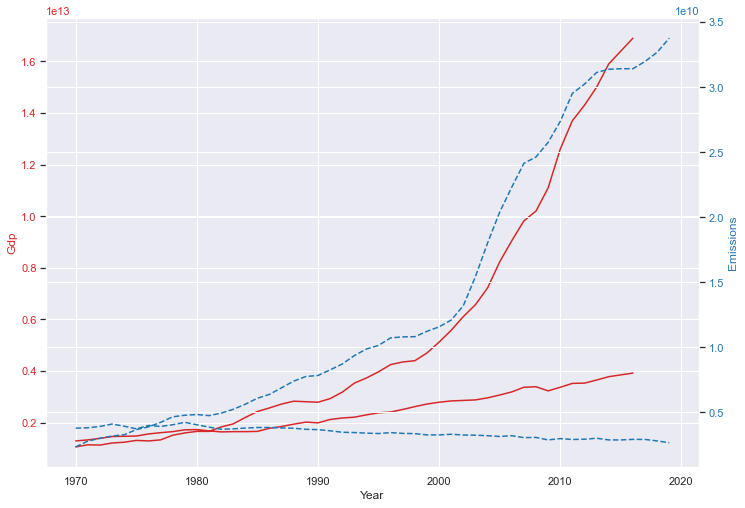

In [281]:
a.gdp_evolution(['Germany', 'China'])

In [222]:
a.show_countries()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia Pacific', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Central America',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Africa', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia'

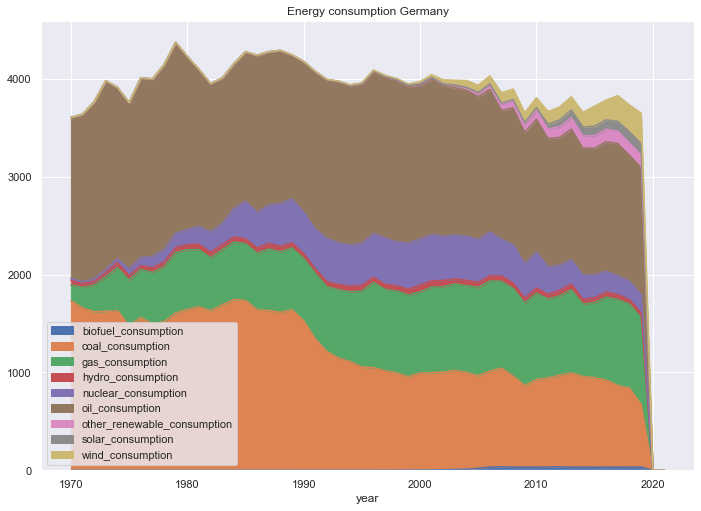

In [187]:
a.chart_consumption('Germany')

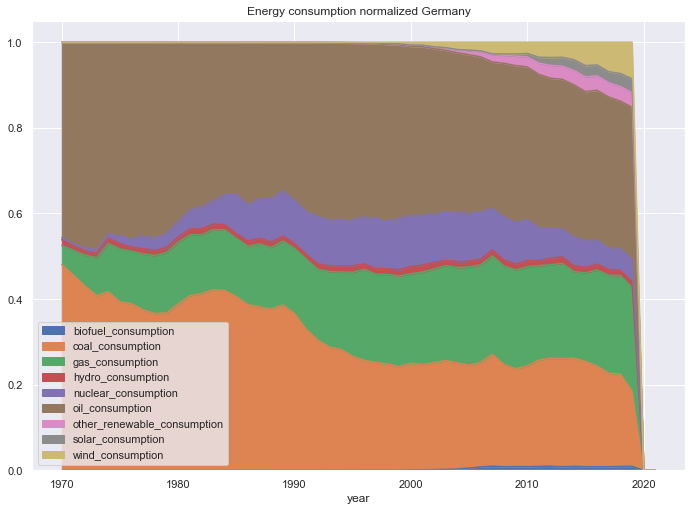

In [162]:
a.chart_consumption('Germany', True)

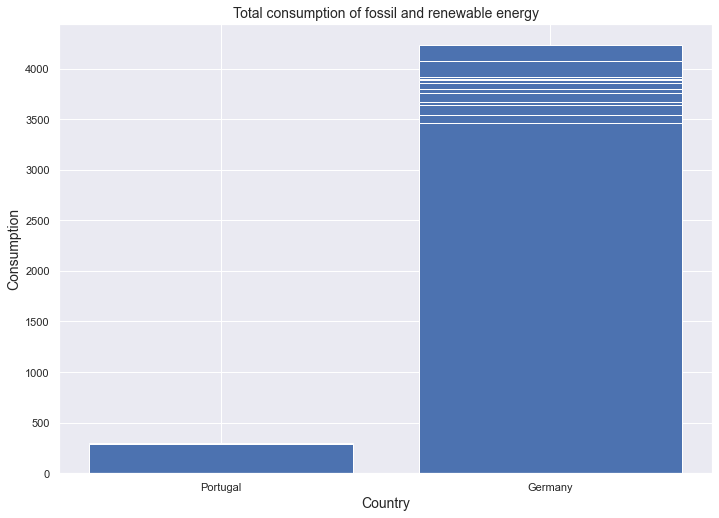

In [163]:
a.total_consumption(["Portugal", "Germany"])

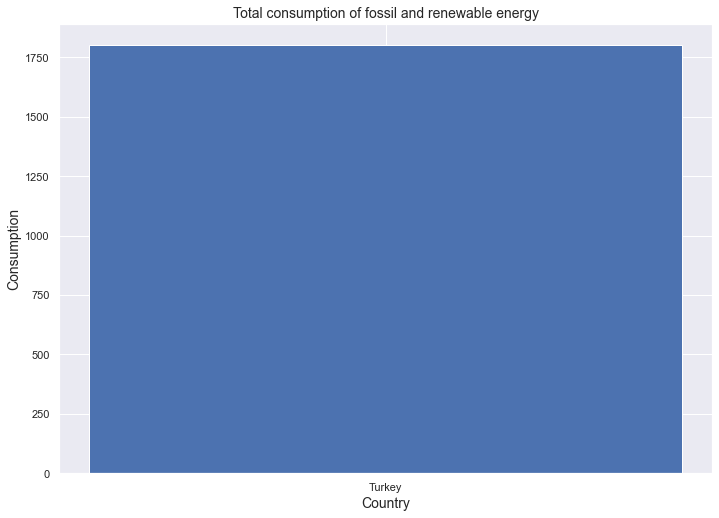

In [164]:
a.total_consumption("Turkey")

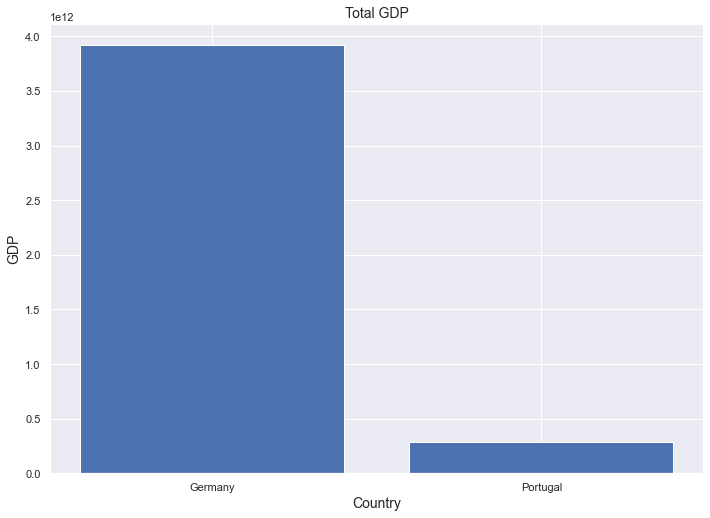

In [165]:
a.gdp(["Germany", "Portugal"])

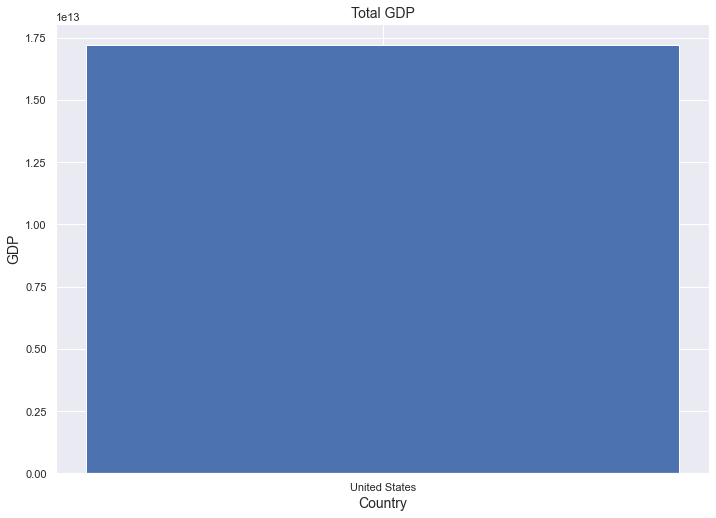

In [166]:
a.gdp("United States")

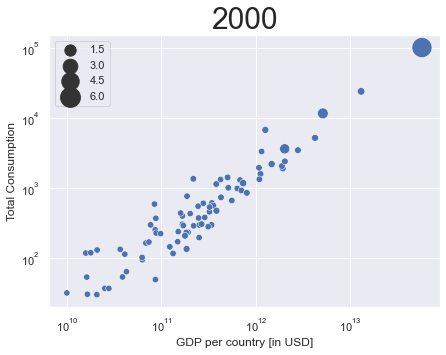

In [167]:
a.gapminder(2000)

In [226]:
a.gdp_evolution(['Germany', 'China'])

UnboundLocalError: local variable 'fig' referenced before assignment

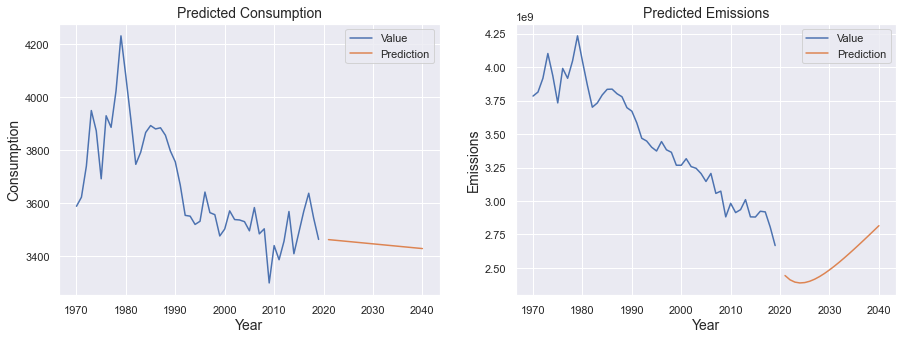

In [171]:
a.ARIMA("Germany", 20)

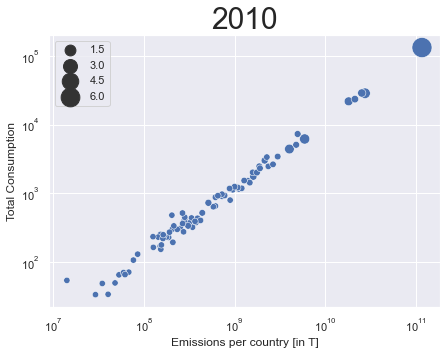

In [194]:
a.scatter_total(2010)